#### All modifications - repeat 10 times

This experiment involves the default setup for all the parameters on GlusterFS (IARAI server local non-scratch local storage), however with the reduced dataset size to 35000, as explained in the write up. The expeirment is repeated 10 times, and here, we are interested in measurement consistency, i.e. throughput dispersion between different experiments. 

In [1]:
from benchmarking.analysis.analyze_results import *

In [2]:
# dataset size
samples = 35000

Data loading function:

In [3]:
def load_all_experiments(output_base_folder, base_folder):
    results_gluster = []
    for folder_index in range(1, 11):
        print(f"Working with {folder_index}")
        gluster_folder_filter= base_folder + str(folder_index) + "/*benchmark_e2e*"

        # read data
        df_dataloader_gluster = extract_timelines(output_base_folder, folder_filter=gluster_folder_filter)

        # Get unique functions 
        unique_functions_gluster = np.unique(df_dataloader_gluster["item_x"])
        print(f"Unique functions: {unique_functions_gluster}")

        unique_runs_gluster = np.unique(df_dataloader_gluster["run"])

        # extract GPU UTIL
        df_gpuutil_gluster = extract_gpuutil(output_base_folder, folder_filter=gluster_folder_filter)
        unique_runs_gluster = np.unique(df_dataloader_gluster["run"])

        # Get data for gluster
        returns_gluster = []
        for run in sorted(unique_runs_gluster):
            df = df_dataloader_gluster[df_dataloader_gluster["run"]==run]
            dfgpu = df_gpuutil_gluster[df_gpuutil_gluster["run"]==run]
            returns_gluster.append(get_gpu_stats(df, dfgpu, run, False, True, False, 2))
        result = pd.DataFrame.from_records(data=returns_gluster)
        result["throughput"] = samples / result["runtime"]
        results_gluster.append(result)
    return results_gluster

In [4]:
impls = ["threaded", "asyncio", "vanilla"]
libs = ["torch", "lightning"]

In [5]:
def add_stats(throughputs):
    df = throughputs.T

    mean = df.mean(axis=1)
    var = df.var(axis=1)
    std = df.std(axis=1)

    df["mean"] = mean.round(2)
    df["var"] = var.round(2)
    df["std"] = std.round(2)
    return df

### slim-2 GlusterFS

In [7]:
# setup folders
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/1701glusterfs_long-temp")
base_folder = "glusterfs_long_"

# Load data
results_gluster = load_all_experiments(output_base_folder, base_folder)

Working with 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [00:11<00:00, 181.10it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [00:01<00:00, 1534.89it/s]


Working with 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2087/2087 [00:11<00:00, 187.43it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2087/2087 [00:01<00:00, 1605.02it/s]


Working with 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2095/2095 [00:11<00:00, 189.09it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2095/2095 [00:01<00:00, 1653.81it/s]


Working with 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2089/2089 [00:11<00:00, 185.37it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2089/2089 [00:01<00:00, 1493.38it/s]


Working with 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2096/2096 [00:11<00:00, 184.31it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2096/2096 [00:01<00:00, 1321.88it/s]


Working with 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:11<00:00, 184.17it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:01<00:00, 1722.93it/s]


Working with 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2101/2101 [00:11<00:00, 186.71it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2101/2101 [00:01<00:00, 1383.98it/s]


Working with 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2094/2094 [00:11<00:00, 184.86it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2094/2094 [00:01<00:00, 1363.59it/s]


Working with 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [00:11<00:00, 186.88it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2102/2102 [00:01<00:00, 1448.70it/s]


Working with 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:11<00:00, 189.09it/s]


Unique functions: ['batch' 'next_data' 'run_training_batch' 'training_batch_to_device']


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2100/2100 [00:01<00:00, 1400.93it/s]


In [8]:
# Check the sizes
print(f"Experiments loaded ... Gluster: {len(results_gluster)}")

Experiments loaded ... Gluster: 10


In [9]:
throughput_all_gluster = plot_all_histograms(results_gluster, impls, libs, False) # display = False (doesn't plot histogrms)

In [10]:
df_t_gluster = add_stats(throughput_all_gluster)
df_t_gluster

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,9.00,9.08,9.57,9.10,9.11,9.09,9.11,9.13,9.15,8.98,9.13,0.03,0.16
threaded_lightning,5.98,6.00,6.00,6.14,6.04,6.03,6.01,5.91,6.07,5.94,6.01,0.00,0.06
asyncio_torch,8.86,8.99,9.10,9.50,9.11,9.45,9.12,8.98,9.02,8.90,9.10,0.05,0.21
asyncio_lightning,5.74,5.93,6.05,6.12,6.08,6.03,5.98,5.95,5.96,6.03,5.99,0.01,0.11
vanilla_torch,3.60,5.33,5.37,3.29,5.33,5.37,3.72,5.33,5.00,4.25,4.66,0.72,0.85
vanilla_lightning,1.33,1.40,1.44,1.31,1.05,1.44,1.05,1.01,1.11,1.08,1.22,0.03,0.18


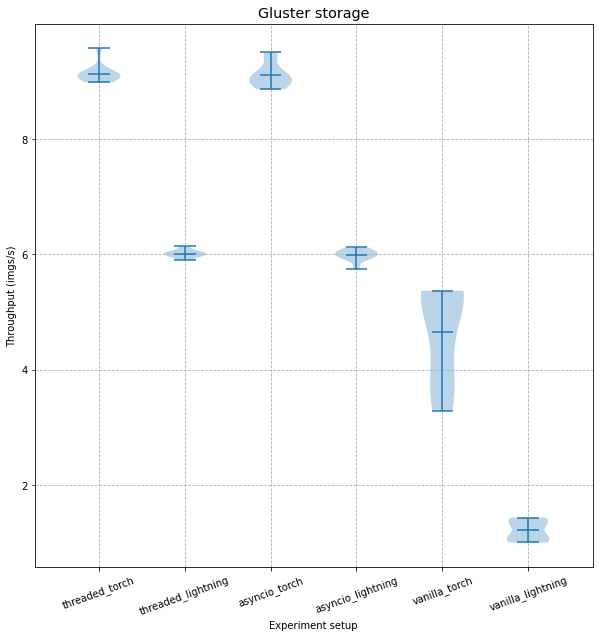

In [11]:
plot_violins(df_t_gluster, "Gluster storage") # 

In [13]:
runtime_all_gluster = plot_all_histograms(results_gluster, impls, libs, False, value="runtime") # display = False (doesn't plot histogrms)

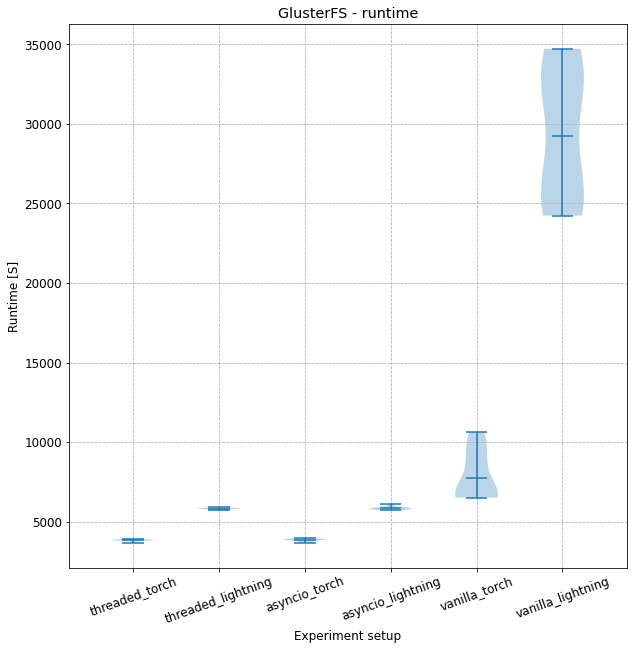

In [16]:
plot_violins(add_stats(runtime_all_gluster), "GlusterFS - runtime", "Runtime [S]")